In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from optimizer import *
from two_layer_net import TwoLayerNet
from mnist import load_mnist

In [3]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [4]:
network = {
    "SGD" : TwoLayerNet(input_size=784, hidden_size=50, output_size=10),
    "Momentum" : TwoLayerNet(input_size=784, hidden_size=50, output_size=10),
    "AdaGrad" : TwoLayerNet(input_size=784, hidden_size=50, output_size=10),
    "Adam" :TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
}
# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

In [5]:
# initializing part
# hyper-parameters, epochs
train_loss_list = {
    "SGD" : [],
    "Momentum" : [],
    "AdaGrad" : [],
    "Adam" : []
}
train_acc_list = {
    "SGD" : [],
    "Momentum" : [],
    "AdaGrad" : [],
    "Adam" : []
}
test_acc_list = {
    "SGD" : [],
    "Momentum" : [],
    "AdaGrad" : [],
    "Adam" : []
}

iter_per_epoch = max(train_size / batch_size, 1)

In [6]:
# set optimizer
optimizers = {
    "SGD" : SGD(lr=0.1),
    "Momentum" : Momentum(lr=0.1),
    "AdaGrad" : AdaGrad(lr=0.1),
    "Adam" : Adam(lr=0.1)
}

In [7]:
for key, optimizer in optimizers.items():
    print(key)
    for i in range(iters_num):
        # 미니배치 획득
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        # 기울기 계산
        #grad = network.numerical_gradient(x_batch, t_batch)
        grad = network[key].gradient(x_batch, t_batch)

        # 매개변수
        optimizer.update(network[key].params, grad)

        # 학습 경과 기록
        loss = network[key].loss(x_batch, t_batch)
        train_loss_list[key].append(loss)

        # 1에폭당 정확도 계산
        if i % iter_per_epoch == 0:
            train_acc = network[key].accuracy(x_train, t_train)
            test_acc = network[key].accuracy(x_test, t_test)
            train_acc_list[key].append(train_acc)
            test_acc_list[key].append(test_acc)
            print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

SGD
train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.78735, 0.7943
train acc, test acc | 0.8766666666666667, 0.8814
train acc, test acc | 0.9002333333333333, 0.9015
train acc, test acc | 0.9088666666666667, 0.9119
train acc, test acc | 0.9151, 0.9177
train acc, test acc | 0.92085, 0.9205
train acc, test acc | 0.9257, 0.926
train acc, test acc | 0.92845, 0.9296
train acc, test acc | 0.9323, 0.9328
train acc, test acc | 0.9353, 0.9349
train acc, test acc | 0.9380666666666667, 0.9384
train acc, test acc | 0.9407333333333333, 0.9407
train acc, test acc | 0.9426833333333333, 0.9418
train acc, test acc | 0.9449833333333333, 0.943
train acc, test acc | 0.9463666666666667, 0.9449
train acc, test acc | 0.94765, 0.9453
Momentum
train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.9292333333333334, 0.9296
train acc, test acc | 0.9494833333333333, 0.9485
train acc, test acc | 0.9588666666666666, 0.9556
train acc, test acc | 0.9665, 0.9612
train acc, te

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'accuracy')

(0.0, 1.0)

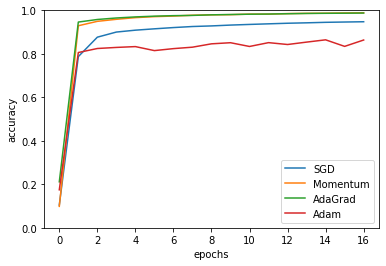

In [10]:
# draw them all - train
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list['SGD']))
for key in optimizers:
    plt.plot(x, train_acc_list[key], label=key)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()